**<h1>TRANSFORMAÇÃO DE DADOS<h1>**

**-Este notebook objetiva a transformação dos dados**

**-Aplicar modelos para normalizar as colunas**

**-Propor um preenchimento dos dados faltantes**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
#pd.set_option('precision', 2)

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving df_playes_com_draft_socolunasFloat.csv to df_playes_com_draft_socolunasFloat (1).csv


In [ ]:
df = pd.read_csv(next(iter(uploaded.keys())))


In [ ]:
df.head()

,Unnamed: 0,value,BIRTHDATE,HEIGHT,WEIGHT,PTS,AST,REB,PIE,heightWOShoesInches,weightLBS,wingspanInches,reachStandingInches,verticalLeapStandingInches,verticalLeapMaxInches,timeLaneAgility,timeThreeQuarterCourtSprint,repsBenchPress135,pctBodyFat,heightWShoesInches,lengthHandInches,widthHandInches,timeModifiedLaneAgility
0,0,18000000.0,1992-08-18,78.0,220.0,9.6,2.3,3.3,0.080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1701593.0,1995-10-02,72.0,180.0,3.9,1.6,1.0,0.062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1517981.0,1998-08-15,81.0,240.0,1.5,0.4,3.0,0.073,80.75,233.2,88.25,109.0,29.0,35.0,12.19,3.23,11.0,5.25,81.75,9.50,10.0,3.03
3,3,1517981.0,1998-08-15,81.0,240.0,1.5,0.4,3.0,0.073,80.75,237.0,87.25,110.0,29.5,33.5,11.29,3.21,13.0,5.40,82.25,9.25,10.0,3.05
4,4,4458000.0,1999-09-01,80.0,218.0,11.2,1.3,4.0,0.053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dtypes

Unnamed: 0                       int64
value                          float64
BIRTHDATE                       object
HEIGHT                         float64
WEIGHT                         float64
PTS                            float64
AST                            float64
REB                            float64
PIE                            float64
heightWOShoesInches            float64
weightLBS                      float64
wingspanInches                 float64
reachStandingInches            float64
verticalLeapStandingInches     float64
verticalLeapMaxInches          float64
timeLaneAgility                float64
timeThreeQuarterCourtSprint    float64
repsBenchPress135              float64
pctBodyFat                     float64
heightWShoesInches             float64
lengthHandInches               float64
widthHandInches                float64
timeModifiedLaneAgility        float64
dtype: object

In [ ]:
df.shape

(533, 23)

In [ ]:
from datetime import date

# # Convertendo aniversario para datetime
# # # Convertemos para datetime para podermos acessar a data
# # # de maneira mais facil pelos atributos do datetime
df["BIRTHDATE"] = pd.to_datetime(df["BIRTHDATE"])

today = date.today()
def getAge(birthday):
    return today.year - birthday.year - ((today.month,
                                          today.day) < (birthday.month,
                                                        birthday.day))
# # Aplicando funcao
df.BIRTHDATE = df.BIRTHDATE.map(lambda x: getAge(x))

In [ ]:
df.isna().sum()


Unnamed: 0                       0
value                            0
BIRTHDATE                      108
HEIGHT                         108
WEIGHT                         108
PTS                            108
AST                            108
REB                            108
PIE                            147
heightWOShoesInches            224
weightLBS                      226
wingspanInches                 222
reachStandingInches            224
verticalLeapStandingInches     281
verticalLeapMaxInches          281
timeLaneAgility                284
timeThreeQuarterCourtSprint    282
repsBenchPress135              332
pctBodyFat                     228
heightWShoesInches             227
lengthHandInches               270
widthHandInches                270
timeModifiedLaneAgility        373
dtype: int64

In [ ]:
print(df.describe())

       Unnamed: 0         value   BIRTHDATE      HEIGHT      WEIGHT  \
count  533.000000  5.330000e+02  425.000000  425.000000  425.000000   
mean   266.000000  7.210486e+06   28.705882   78.630588  220.004706   
std    154.008117  9.048857e+06    4.039964    3.389427   24.693498   
min      0.000000  2.500000e+04   21.000000   69.000000  170.000000   
25%    133.000000  1.620564e+06   25.000000   76.000000  201.000000   
50%    266.000000  3.372840e+06   28.000000   79.000000  219.000000   
75%    399.000000  9.258000e+06   32.000000   81.000000  237.000000   
max    532.000000  4.300636e+07   42.000000   88.000000  290.000000   

              PTS         AST         REB         PIE  heightWOShoesInches  \
count  425.000000  425.000000  425.000000  386.000000           309.000000   
mean     9.648706    2.120706    3.954118    0.085578            77.906958   
std      6.788274    1.922004    2.523930    0.092512             3.131202   
min      0.000000    0.000000    0.000000   -1.5

### LIMPANDO A BASE DE DADOS

Apos uma pesquisa sobre o significado dos atributos, podemos perceber que a base contém muitos valores que se repetem ou podem ser considerados complementares. Por exemplo:

* ```weight``` o atributo esta sendo repetido,sendo que, apenas a unidade de medida é modificada.Assim, o campo ```weightLBS``` será eliminado.

* ```heightWOShoesInches``` representa o tamanho do jogador descalço. Desta maneira,  o atributo ```height``` consegue demontrar a qualidade do jogador.

* ```heightWShoesInches``` é a altura com sapatos. Iremos considerar que apenas o atributo ```height``` é suficiente para classificar.

* ```verticalLeapStanding``` possuem duas colunas. Uma com o max e outra que provavelmente é a media dos saltos do jogador. Desta maneira, iremos utilizar apenas o atributo com a maior contagem dos saltos.



In [ ]:
del df['weightLBS']
del df['heightWOShoesInches']
del df['heightWShoesInches']
del df['verticalLeapMaxInches']

#Desta maneira, houve uma redução no numero de atributos. De 23 foram para 19
print("\nDimensao da base de dados NBA:\n{0}\n".format(df.shape))


Dimensao da base de dados NBA:
(533, 19)



### PREENCHENDO OS DADOS FALTANTES

Os atributos possuem muitos valores faltantes, desta maneira, torna-se interessante procurar alguma correlação de um atributo com outro, para preencher os dados omissos

* Como a única coluna completamente preenchida é a ```value``` iremos utilizar ela para completar os dados das seguintes categorias:

* ```BIRTHDATE```, ```HEIGHT```, ```WEIGHT```,```PTS```,```AST```, ```REB```, ```PIE```


* Primeiro, torna-se necessário particionar a base de dados

In [ ]:
df_particao = df.copy()

In [ ]:
primeiras_categorias = ['value','BIRTHDATE','HEIGHT','WEIGHT','PTS','AST','REB','PIE']
df_particao_primeiras_categorias = df_particao[primeiras_categorias]


In [ ]:
df_particao_primeiras_categorias.shape

(533, 8)

In [ ]:
df_particao_primeiras_categorias.isna().sum()

value          0
BIRTHDATE    108
HEIGHT       108
WEIGHT       108
PTS          108
AST          108
REB          108
PIE          147
dtype: int64

* Utilizando o dropna para retirar as linhas com valores faltantes

In [ ]:
df_particionado = df_particao_primeiras_categorias.dropna(axis=0)
df_particionado.shape

(386, 8)

In [ ]:
df_particionado.describe()

,value,BIRTHDATE,HEIGHT,WEIGHT,PTS,AST,REB,PIE
count,3.860000e+02,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,8.659054e+06,28.588083,78.650259,219.865285,9.990674,2.206477,4.060881,0.085578
std,9.902114e+06,3.946231,3.338786,24.831118,6.903210,1.965094,2.551261,0.092512
min,5.000000e+04,21.000000,71.000000,170.000000,0.000000,0.000000,0.000000,-1.500000
25%,1.631388e+06,25.000000,76.000000,200.000000,4.700000,0.900000,2.200000,0.071000
50%,4.408500e+06,28.000000,79.000000,218.500000,8.500000,1.600000,3.550000,0.090000
75%,1.216851e+07,31.000000,81.000000,236.750000,13.700000,2.900000,5.275000,0.112750
max,4.300636e+07,42.000000,88.000000,290.000000,31.800000,11.200000,14.200000,0.211000


In [ ]:
df_particionado.isna().sum()

value        0
BIRTHDATE    0
HEIGHT       0
WEIGHT       0
PTS          0
AST          0
REB          0
PIE          0
dtype: int64

In [ ]:
df_particionado.columns

Index(['value', 'BIRTHDATE', 'HEIGHT', 'WEIGHT', 'PTS', 'AST', 'REB', 'PIE'], dtype='object')

### CORRELOGRAMA (Matriz de Correlação)

* Analise a relação entre pares de variáveis numéricas  

* Permitem visualizar as relações de todo o conjunto de dados de uma só vez

* A relação entre cada par de variáveis é geralmente mostrada com um gráfico de dispersão

* Enquanto a diagonal representa a distribuição de cada variável, usando um histograma ou um gráfico de densidade

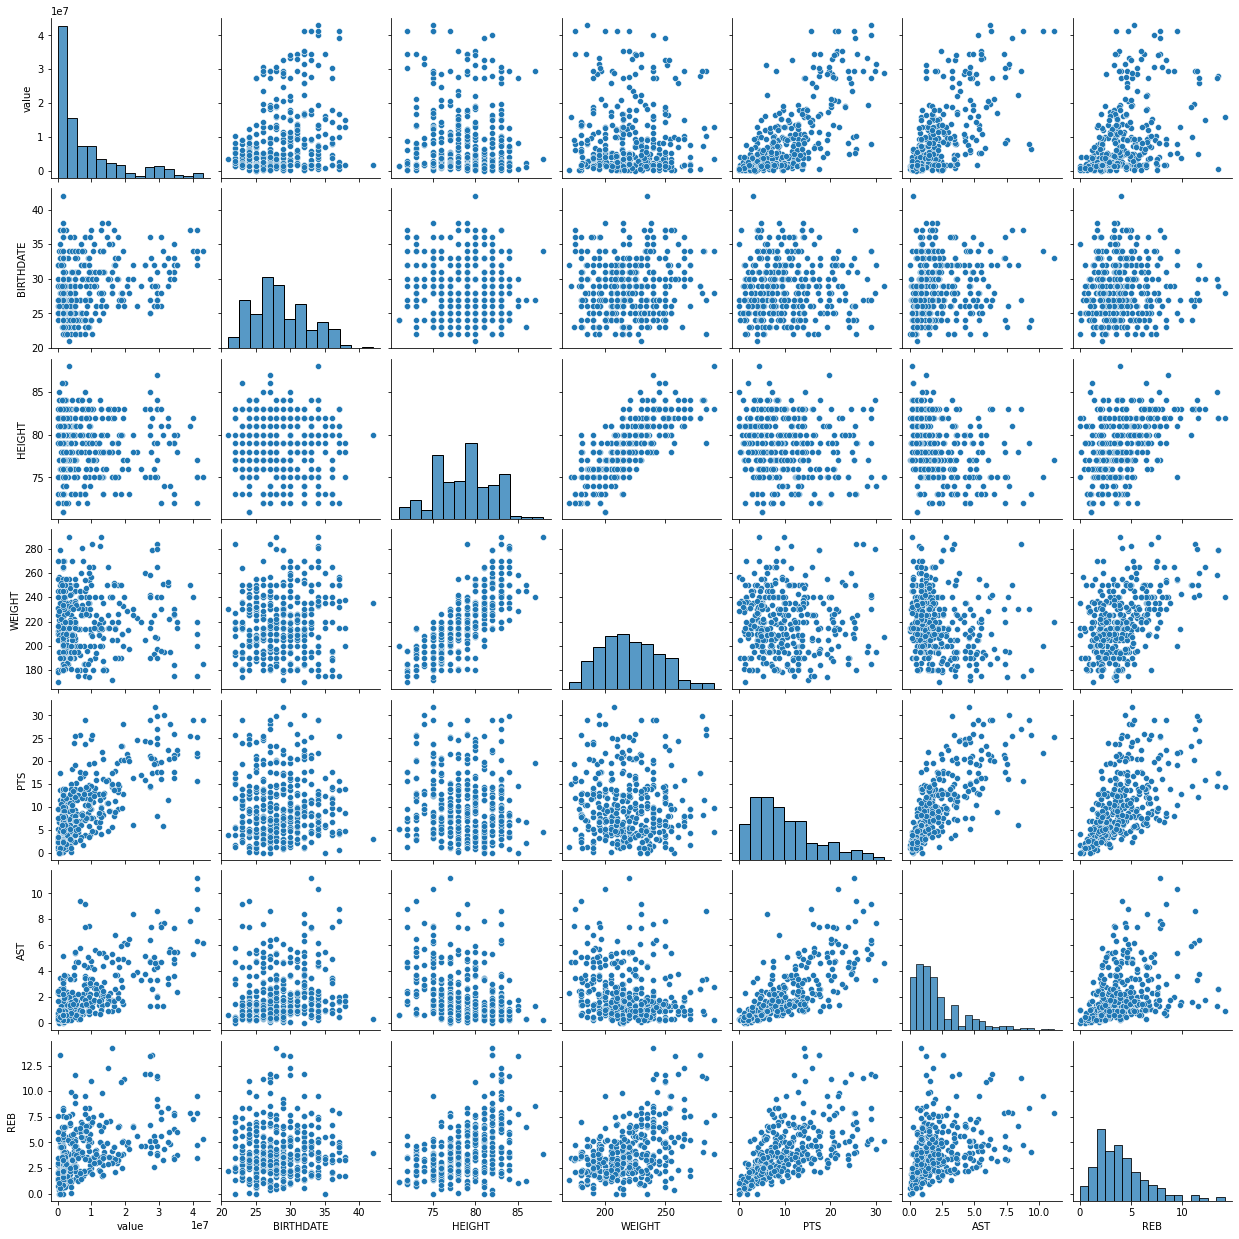

In [ ]:
df_correlacao = df_particionado[['value', 'BIRTHDATE', 'HEIGHT', 'WEIGHT', 'PTS', 'AST', 'REB']]
sns.pairplot(df_correlacao); # criando um correlograma

### PREENCHENDO OS DADOS FALTANTES ATRÁVES DE CORRELAÇÃO

* Como é possivel perceber, as variáveis HEIGHT e WEIGHT possuem uma forte correlação

* Outras relações muito próximas ocorrem nas categorias ```value```, ```PTS``` , ```AST``` e ```REB```

### REALIZANDO GRÁFICO DE DISPERSÃO ENTRE AS CATEGORIAS SELECIONADAS

[Text(0, 0.5, 'WEIGHT'), Text(0.5, 0, 'HEIGHT')]

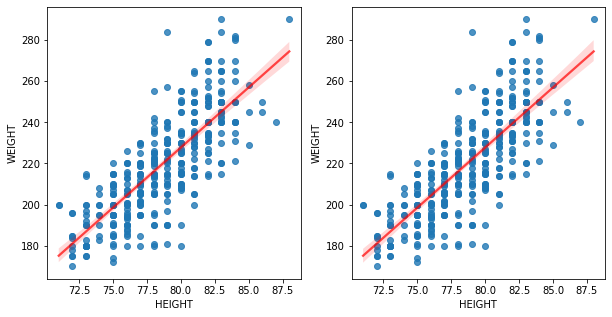

In [ ]:
# Gráfico de dispersão com o ajuste linear
fig, ax = plt.subplots(ncols=2,figsize=(10,5))
line_kws = {"color":"r","alpha":0.7}
sns.regplot(x='HEIGHT', y='WEIGHT',
            data=df_particionado, ax=ax[0],
            line_kws=line_kws)
ax[0].set(xlabel='HEIGHT',
          ylabel='WEIGHT')
sns.regplot(x='HEIGHT', y='WEIGHT',
            data=df_particionado, ax=ax[1],
            line_kws=line_kws)
ax[1].set(xlabel='HEIGHT',
          ylabel='WEIGHT')

* Obtendo a equação de correlação entre as variáveis com plotly

In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px

In [ ]:
figHW = px.scatter(df_particionado,x='HEIGHT',y='WEIGHT',color='WEIGHT',trendline='ols')
figHW.show()

In [ ]:
#Equação do peso
peso = 5.83622*df_particionado['HEIGHT'] -239.155

In [ ]:
figWH = px.scatter(df_particionado,x='WEIGHT',y='HEIGHT',color='HEIGHT',trendline='ols')
figWH.show()

In [ ]:
#Equação da altura
altura = 0.105516*df_particionado['WEIGHT']+55.451

* Realizando o procedimento para AST e PTS

[Text(0, 0.5, 'AST'), Text(0.5, 0, 'PTS')]

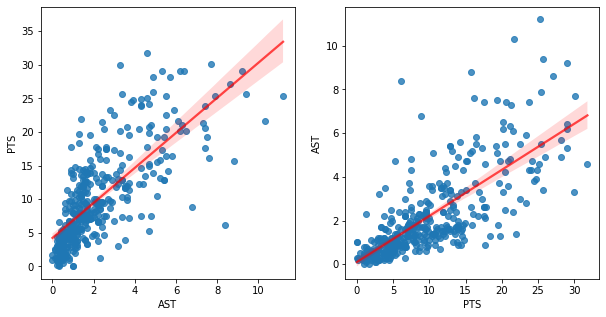

In [ ]:
# Gráfico de dispersão com o ajuste linear
fig, ax = plt.subplots(ncols=2,figsize=(10,5))
line_kws = {"color":"r","alpha":0.7}
sns.regplot(x='AST', y='PTS',
            data=df_particionado, ax=ax[0],
            line_kws=line_kws)
ax[0].set(xlabel='AST',
          ylabel='PTS')
sns.regplot(x='PTS', y='AST',
            data=df_particionado, ax=ax[1],
            line_kws=line_kws)
ax[1].set(xlabel='PTS',
          ylabel='AST')

In [ ]:
figAP = px.scatter(df_particionado,x='AST',y='PTS',color='PTS',trendline='ols')
figAP.show()

In [ ]:
#Equação para PTS
pontos = 2.60377*df_particionado['AST'] + 4.24551

In [ ]:
figPA = px.scatter(df_particionado,x='PTS',y='AST',color='AST',trendline='ols')
figPA.show()

In [ ]:
#Equação para AST
assistencia = 0.210993*df_particionado['PTS'] + 0.0985175

* REALIZANDO O PROCEDIMENTO PARA PTS E VALUE

[Text(0, 0.5, 'PTS'), Text(0.5, 0, 'value')]

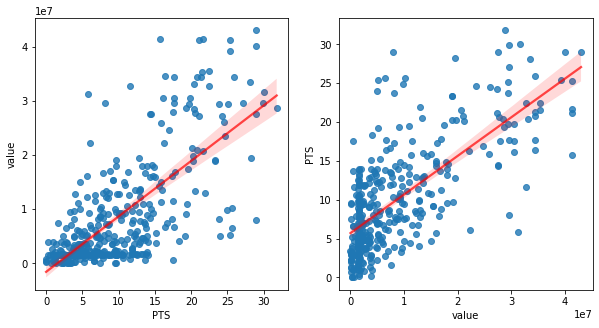

In [ ]:
# Gráfico de dispersão com o ajuste linear
fig, ax = plt.subplots(ncols=2,figsize=(10,5))
line_kws = {"color":"r","alpha":0.7}
sns.regplot(x='PTS', y='value',
            data=df_particionado, ax=ax[0],
            line_kws=line_kws)
ax[0].set(xlabel='PTS',
          ylabel='value')
sns.regplot(x='value', y='PTS',
            data=df_particionado, ax=ax[1],
            line_kws=line_kws)
ax[1].set(xlabel='value',
          ylabel='PTS')

In [ ]:
figPV = px.scatter(df_particionado,x='value',y='PTS',color='PTS',trendline='ols')
figPV.show()

In [ ]:
pontos_salario = 0.000000497381*df_particionado['value']+5.68382

### A coluna WEIGHT possui uma distribuição muito próxima da normal. O seu desvio padrão é muito reduzido em relação à media. Assim, iremos preencher os valores faltante do ```df_particao_primeiras_categorias``` com a mediana
### Outro caso que também pode ser aplicado é utilizar do salário  ```value``` para preencher o campo ```PTS``` e assim completar as outras categorias

In [ ]:
#Completando o campo WEIGHT
mediana = np.median([el for el in df_particao_primeiras_categorias["WEIGHT"] if (np.isnan(el) == False)])

new_weight = np.where(df_particao_primeiras_categorias["WEIGHT"].isna(), # condição
                   mediana,                       # valor se verdadeiro
                   df_particao_primeiras_categorias["WEIGHT"])          # valor se falso
df_particao_primeiras_categorias["WEIGHT"] = new_weight
#df_particao_primeiras_categorias.where(df_particao_primeiras_categorias['WEIGHT'].isna())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# O mesmo procedimento será aplicado para o campo  BIRTHDATE
#Aqui, o valor do salário com a idade não possuem uma relação específica.
mediana_birth = np.median([el for el in df_particao_primeiras_categorias["BIRTHDATE"] if (np.isnan(el) == False)])

new_birthdate = np.where(df_particao_primeiras_categorias["BIRTHDATE"].isna(), # condição
                   mediana_birth,                       # valor se verdadeiro
                   df_particao_primeiras_categorias["BIRTHDATE"])          # valor se falso
df_particao_primeiras_categorias["BIRTHDATE"] = new_birthdate


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_particao_primeiras_categorias.isna().sum()

value          0
BIRTHDATE      0
HEIGHT       108
WEIGHT         0
PTS          108
AST          108
REB          108
PIE          147
dtype: int64

### Como temos os campos ```WEIGHT``` e ```value``` completamente preenchidos, iremos preencher os outros com as equações obtidas dos gráficos

In [ ]:
for linha in df_particao_primeiras_categorias['WEIGHT']:
    new_height = np.where(df_particao_primeiras_categorias["HEIGHT"].isna(),
                         0.105516*df_particao_primeiras_categorias['WEIGHT']+55.451,
                         df_particao_primeiras_categorias['HEIGHT'])

In [ ]:
df_particao_primeiras_categorias['HEIGHT'] = new_height

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



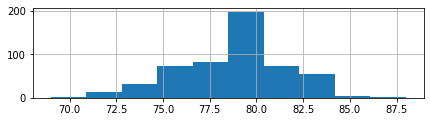

In [ ]:
df_particao_primeiras_categorias['HEIGHT'].hist(figsize=(7, 1.65))

In [ ]:
df_particao_primeiras_categorias.isna().sum()

value          0
BIRTHDATE      0
HEIGHT         0
WEIGHT         0
PTS          108
AST          108
REB          108
PIE          147
dtype: int64

* Realizando o procedimento para o campo ```PTS``` em função de ```value```

In [ ]:
for linha in df_particao_primeiras_categorias['value']:
    new_PTS = np.where(df_particao_primeiras_categorias["PTS"].isna(),
                         0.000000497381*df_particao_primeiras_categorias['value']+5.68382,
                         df_particao_primeiras_categorias['PTS'])

In [ ]:
df_particao_primeiras_categorias['PTS'] = new_PTS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_particao_primeiras_categorias.isna().sum()

value          0
BIRTHDATE      0
HEIGHT         0
WEIGHT         0
PTS            0
AST          108
REB          108
PIE          147
dtype: int64

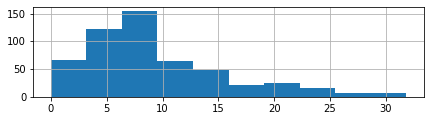

In [ ]:
df_particao_primeiras_categorias['PTS'].hist(figsize=(7, 1.65))

* Agora iremos preencher os campos AST e REB com as equações encontradas pelos gráficos

In [ ]:
for linha in df_particao_primeiras_categorias['PTS']:
    new_AST = np.where(df_particao_primeiras_categorias["AST"].isna(),
                       0.210993*df_particao_primeiras_categorias['PTS'] + 0.0985175,
                       df_particao_primeiras_categorias['AST'])


In [ ]:
df_particao_primeiras_categorias['AST'] = new_AST

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_particao_primeiras_categorias.isna().sum()


value          0
BIRTHDATE      0
HEIGHT         0
WEIGHT         0
PTS            0
AST            0
REB          108
PIE          147
dtype: int64

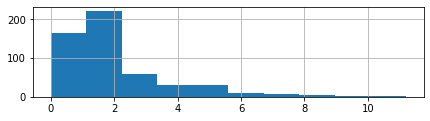

In [ ]:
df_particao_primeiras_categorias['AST'].hist(figsize=(7, 1.65))

### REALIZANDO O CORRELOGRAMA COM A NOVA TABELA PREENCHIDA

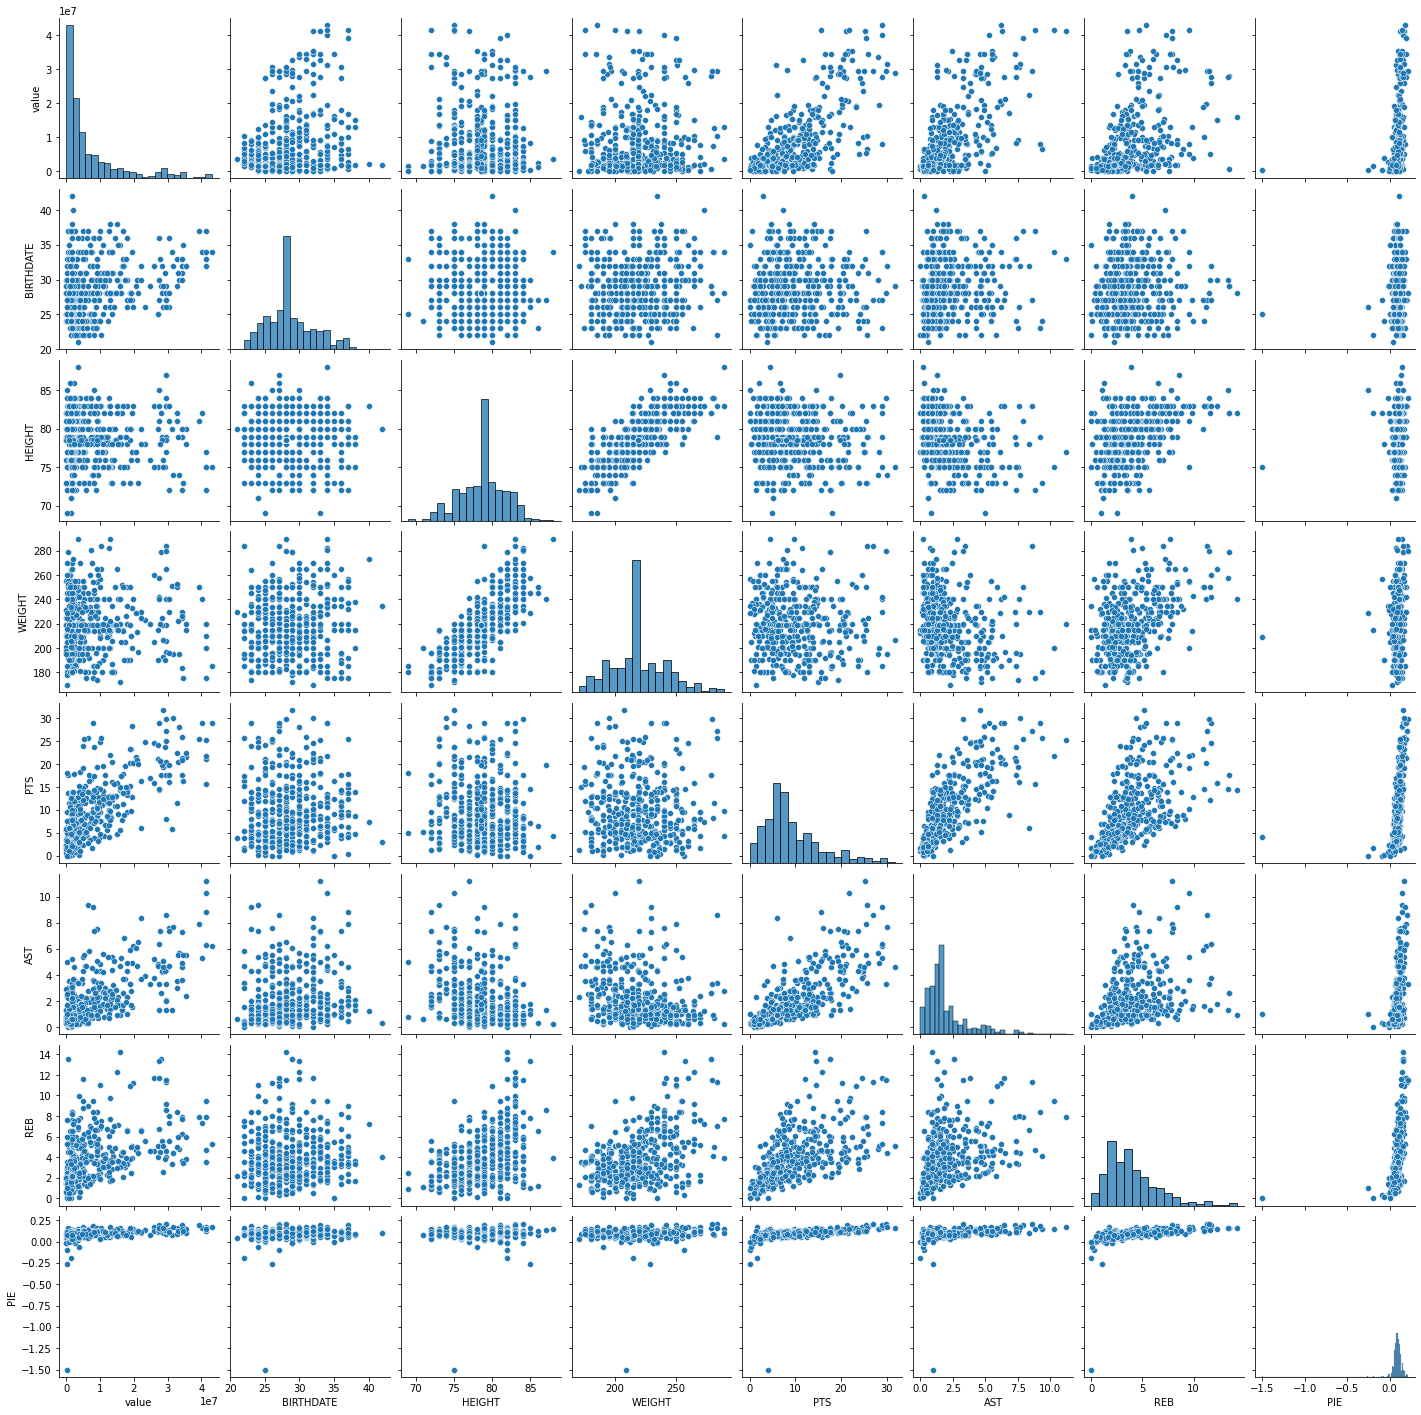

In [ ]:
sns.pairplot(df_particao_primeiras_categorias)

* O CAMPO REB POSSUI A MELHOR CORRELAÇÃO COM O ATRIBUTO PTS

* O CAMPO PIE NÃO POSSUI CORRELAÇÃO COM NENHUM DOS OUTROS CAMPOS, DESTA MANEIRA SERÁ DESCARTADO DA BASE

In [ ]:
del df_particao_primeiras_categorias['PIE']

In [ ]:
# Construção da matriz de correlação para features NBA
features = ['value', 'WEIGHT', 'PTS','REB', 'AST']
df[features].corr(method='pearson')    # Aqui, vamos utilizar a correlação de Spearman

,value,WEIGHT,PTS,REB,AST
value,1.000000,0.028946,0.713793,0.451511,0.669296
WEIGHT,0.028946,1.000000,-0.036448,0.460586,-0.223830
PTS,0.713793,-0.036448,1.000000,0.574257,0.748729
REB,0.451511,0.460586,0.574257,1.000000,0.369075
AST,0.669296,-0.223830,0.748729,0.369075,1.000000


### COMO MOSTRA A MATRIZ DE CORRELAÇÃO, A MAIOR EXPLICAÇÃO PARA O REB ESTA CONTIDA NO PTS

In [ ]:
figREB = px.scatter(df_particao_primeiras_categorias,x='PTS',y='REB',color='REB',trendline='ols')
figREB.show()

* A correlação apresentada no gráfico acima possui pouca significância, desta maneira, iremos preencher os valores faltantes com a média do atributo

In [ ]:
#Completando o campo REB
media = np.mean([el for el in df_particao_primeiras_categorias["REB"] if (np.isnan(el) == False)])

new_REB = np.where(df_particao_primeiras_categorias["REB"].isna(), # condição
                   media,                       # valor se verdadeiro
                   df_particao_primeiras_categorias["REB"])          # valor se falso
df_particao_primeiras_categorias["REB"] = new_REB

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_particao_primeiras_categorias.isna().sum()

value        0
BIRTHDATE    0
HEIGHT       0
WEIGHT       0
PTS          0
AST          0
REB          0
dtype: int64

In [ ]:
df_particao_primeiras_categorias.head()

,value,BIRTHDATE,HEIGHT,WEIGHT,PTS,AST,REB
0,18000000.0,30.0,78.0,220.0,9.6,2.3,3.3
1,1701593.0,27.0,72.0,180.0,3.9,1.6,1.0
2,1517981.0,24.0,81.0,240.0,1.5,0.4,3.0
3,1517981.0,24.0,81.0,240.0,1.5,0.4,3.0
4,4458000.0,23.0,80.0,218.0,11.2,1.3,4.0


### NORMALIZAÇÃO DOS DADOS

* não é uma etapa obrigatória, mas uma boa prática, pois atributos em um padrão auxiliam o desempenho de modelos, algoritmos e afins

* Aqui, iremos utilizar dois modelos:  Reescalonamento e Padronização

In [ ]:
df_padr = df_particao_primeiras_categorias.copy()
df_norm = df_particao_primeiras_categorias.copy()

## Normalização

* reescalona atributos numéricos em um intervalo de 0 a 1

In [ ]:
for coluna in df_norm.columns:  # Para cada coluna,
    df_norm[coluna] = (  # Normalização min-max
        df_norm[coluna] - df_norm[coluna].min()
    ) / (df_norm[coluna].max() - df_norm[coluna].min())
df_norm.head(3)

,value,BIRTHDATE,HEIGHT,WEIGHT,PTS,AST,REB
0,0.418205,0.428571,0.473684,0.416667,0.301887,0.205357,0.232394
1,0.039007,0.285714,0.157895,0.083333,0.122642,0.142857,0.070423
2,0.034736,0.142857,0.631579,0.583333,0.047170,0.035714,0.211268


## Padronização

* reescalona a distribuição de cada atributo para média igual
a zero e desvio padrão igual a um

In [ ]:
for coluna in df_padr.columns:  # Para cada coluna,
    df_padr[coluna] = (  # Padronização
        df_padr[coluna] - df_padr[coluna].mean()
    ) / (df_padr[coluna].std())
df_padr.head(3)

,value,BIRTHDATE,HEIGHT,WEIGHT,PTS,AST,REB
0,1.192362,0.397242,-0.203595,0.009020,0.057675,0.150882,-0.290303
1,-0.608794,-0.431987,-2.186392,-1.805147,-0.860259,-0.251661,-1.311062
2,-0.629086,-1.261216,0.787804,0.916103,-1.246758,-0.941733,-0.423445


### VISUALIZAÇÃO DA DISTRIBUIÇÃO DOS ATRIBUTOS PARA APLICAÇÃO NO NOVO MODELO

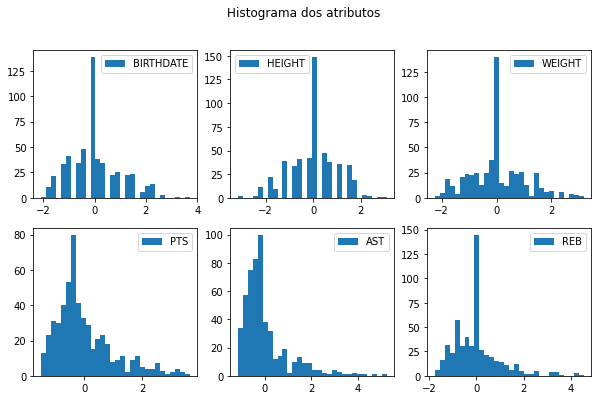

In [ ]:
colunas_atributos = [ 'BIRTHDATE', 'HEIGHT','WEIGHT','PTS', 'AST', 'REB']
X = df_padr[colunas_atributos]
y = df_padr['value']
# Exibe o histograma dos atributos.

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
plt.suptitle("Histograma dos atributos")

for i in range(2):
    for j in range(3):
        ax[i, j].hist(X.iloc[:,(i*3 + j)], label=colunas_atributos[i*3+j], bins=30)
        ax[i, j].legend()

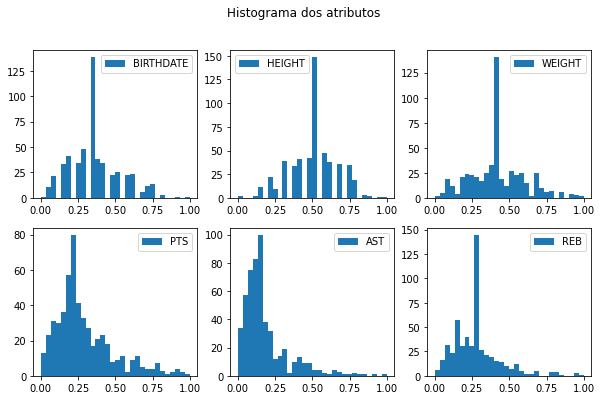

In [ ]:
colunas_atributos = [ 'BIRTHDATE', 'HEIGHT','WEIGHT','PTS', 'AST', 'REB']
X = df_norm[colunas_atributos]
y = df_norm['value']
# Exibe o histograma dos atributos.

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
plt.suptitle("Histograma dos atributos")

for i in range(2):
    for j in range(3):
        ax[i, j].hist(X.iloc[:,(i*3 + j)], label=colunas_atributos[i*3+j], bins=30)
        ax[i, j].legend()

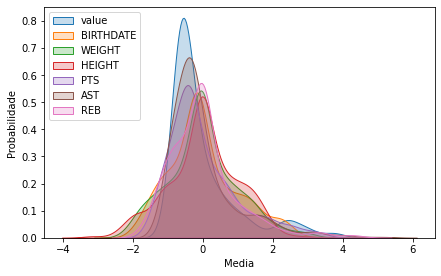

In [ ]:
# Plotando varias distribuições em uma mesma figura

fig = sns.kdeplot(df_padr['value'], shade=True, label='value')
fig = sns.kdeplot(df_padr['BIRTHDATE'], shade=True, label='BIRTHDATE')
fig = sns.kdeplot(df_padr['WEIGHT'], shade=True, label='WEIGHT')
fig = sns.kdeplot(df_padr['HEIGHT'], shade=True, label='HEIGHT')
fig = sns.kdeplot(df_padr['PTS'], shade=True, label='PTS')
fig = sns.kdeplot(df_padr['AST'], shade=True, label='AST')
fig = sns.kdeplot(df_padr['REB'], shade=True, label='REB')

plt.xlabel("Media")
plt.ylabel("Probabilidade")
plt.legend(loc='upper left')
plt.gcf().set_size_inches([7, 4.25])

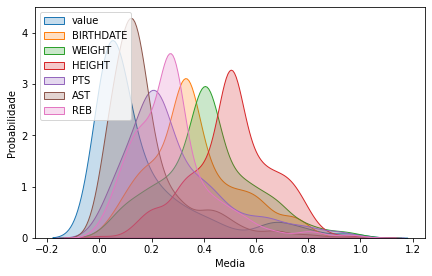

In [ ]:
fig = sns.kdeplot(df_norm['value'], shade=True, label='value')
fig = sns.kdeplot(df_norm['BIRTHDATE'], shade=True, label='BIRTHDATE')
fig = sns.kdeplot(df_norm['WEIGHT'], shade=True, label='WEIGHT')
fig = sns.kdeplot(df_norm['HEIGHT'], shade=True, label='HEIGHT')
fig = sns.kdeplot(df_norm['PTS'], shade=True, label='PTS')
fig = sns.kdeplot(df_norm['AST'], shade=True, label='AST')
fig = sns.kdeplot(df_norm['REB'], shade=True, label='REB')

plt.xlabel("Media")
plt.ylabel("Probabilidade")
plt.legend(loc='upper left')
plt.gcf().set_size_inches([7, 4.25])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=1).fit(X_train, y_train)


predictions = forest_model.predict(y_test)
print(predictions)

ValueError: ignored

### APLICAÇÃO DE UM NOVO MODELO NA BASE DE DADOS

In [ ]:
# Amostragem de dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import matplotlib.pyplot as plt

colunas_atributos = ['BIRTHDATE', 'HEIGHT','WEIGHT','PTS', 'AST', 'REB']
#X = df_padr[colunas_atributos]
#y = df_padr['value']
X = df_norm[colunas_atributos]
y = df_norm['value']

print("Numero de atributos original:")
print(X.shape)

# O PolynomialFeaures() aumenta a dimensão dos dados produzindo novos atributos 
# que são combinações lineares dos dados originais.

# X = MinMaxScaler().fit_transform(df_norm)
# X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

# print("Polynomial Features (atributos redundantes):")
# print(X.shape)
# y = df_norm['value']


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# print("Base de treinamento:{0}".format(X_train.shape))
# print("Base de teste:{0}".format(X_test.shape))


Numero de atributos original:
(533, 6)


### Regressão Linear


Os passos para indução de um modelo são:

1.   Instanciar o modelo: ``` LinearRegression()```
2.   Treinar o modelo: ```fit()```

O método ```score()``` retorna o coeficiente R^2 de predição.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Regressão Linear (com atributos redundantes)")
print("Acurácia na base de treinamento: {:.2f}".format(lr.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lr.score(X_test, y_test)))


Regressão Linear (com atributos redundantes)
Acurácia na base de treinamento: 0.61
Acurácia na base de teste: 0.63


In [ ]:
salario_jogador = [[0.428571],[0.473684],[0.416667],[0.301887],[0.205357],[0.232394]]
lr.predict(salario_jogador)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



ValueError: ignored

### Ridge (Regressão linear com regularização L2)

Força uma redução do valor dos coeficientes, penalizando coeficientes grandes que não contribuem significativamente para a explicação da variância do sinal.

A força da regularização é dada pelo atributo ```alpha```, com valor *default* igual a 1.


In [ ]:
ridge = Ridge().fit(X_train, y_train)
print("Ridge alpha=1")
print("Acurácia na base de treinamento: {:.2f}".format(ridge.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Ridge alpha=10")
print("Acurácia na base de treinamento: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(ridge10.score(X_test, y_test)))


ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Ridge alpha=0.1")
print("Acurácia na base de treinamento: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(ridge01.score(X_test, y_test)))



Ridge alpha=1
Acurácia na base de treinamento: 0.61
Acurácia na base de teste: 0.62
Ridge alpha=10
Acurácia na base de treinamento: 0.55
Acurácia na base de teste: 0.55
Ridge alpha=0.1
Acurácia na base de treinamento: 0.61
Acurácia na base de teste: 0.63


### Comparação da Regressão linear e Ridge

O gráfico exibe a magnitude dos coeficientes obtidos por cada método. Pode-se observar como a regularização afeta a magnitude dos coeficientes do Ridge como um todo, mas sem zerar coeficientes de uma forma geral.

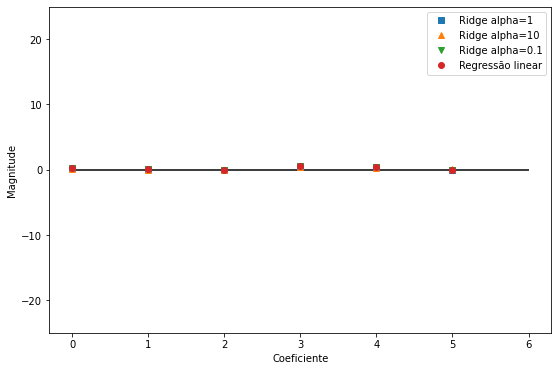

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="Regressão linear")
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()



### LASSO (Regressão linear com regularização L1)

Força uma redução do valor dos coeficientes, podendo zerar diversos coeficientes cujos atributos não contribuem significativamente para a previsão. Muito utilizado no apoio à tarefa de seleção de atributos (*feature selection*).

A força da regularização é dada pelo atributo ```alpha```, com valor *default* igual a 1. ```Alpha=0``` resulta na regressão linear tradicional.


In [ ]:
lasso = Lasso().fit(X_train, y_train)
print("Lasso alpha=1")
print("Acurácia na base de treinamento: {:.2f}".format(lasso.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lasso.coef_ != 0)))


lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Lasso alpha=.01")
print("Acurácia na base de treinamento: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lasso001.coef_ != 0)))


lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Lasso alpha=.0001")
print("Acurácia na base de treinamento: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lasso00001.coef_ != 0)))



Lasso alpha=1
Acurácia na base de treinamento: 0.00
Acurácia na base de teste: -0.00
Número de atributos usados: 0
Lasso alpha=.01
Acurácia na base de treinamento: 0.47
Acurácia na base de teste: 0.46
Número de atributos usados: 1
Lasso alpha=.0001
Acurácia na base de treinamento: 0.61
Acurácia na base de teste: 0.63
Número de atributos usados: 6


### Comparação da LASSO e Ridge

O gráfico exibe a magnitude dos coeficientes obtidos por cada método.

Text(0, 0.5, 'Magnitude')

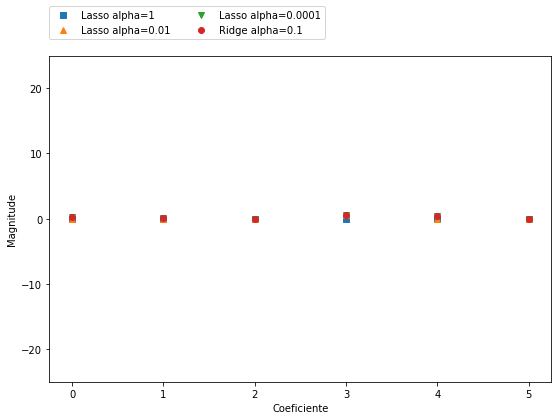

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")


### -------- OS CÓDIGOS ABAIXO NÃO FORAM UTILIZADOS------------ ###

In [ ]:
#Testando o algoritmo de matriz de correlação, mesmo com dados faltantes.
#Entretanto, o resultado não é apresentado
float_fields = df_particao_primeiras_categorias.dtypes[df_particao_primeiras_categorias.dtypes == "float64"].index
corr = np.corrcoef(df_particao_primeiras_categorias[float_fields].transpose())
correlacao = pd.DataFrame(data=corr, index=float_fields, columns=float_fields)

print("\nMatriz de correlação dos atributos float:\n{0}".format(correlacao))


Matriz de correlação dos atributos float:
              value  BIRTHDATE    HEIGHT    WEIGHT       PTS       AST  \
value      1.000000   0.270552 -0.020053  0.030932  0.729936  0.678575   
BIRTHDATE  0.270552   1.000000 -0.004091  0.103535  0.079333  0.159135   
HEIGHT    -0.020053  -0.004091  1.000000  0.784841 -0.092010 -0.302854   
WEIGHT     0.030932   0.103535  0.784841  1.000000 -0.033180 -0.219082   
PTS        0.729936   0.079333 -0.092010 -0.033180  1.000000  0.756421   
AST        0.678575   0.159135 -0.302854 -0.219082  0.756421  1.000000   
REB        0.430324   0.081574  0.435689  0.460509  0.560441  0.364175   

                REB  
value      0.430324  
BIRTHDATE  0.081574  
HEIGHT     0.435689  
WEIGHT     0.460509  
PTS        0.560441  
AST        0.364175  
REB        1.000000  
